# SHAP Analysis

In [1]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 5.1 MB/s eta 0:00:00


Accuracy: 0.7526881720430108
Classification Report:
                      precision    recall  f1-score   support

marginally suitable       0.75      0.75      0.75        12
moderately suitable       0.40      0.33      0.36         6
       not suitable       0.89      0.73      0.80        11
           suitable       0.53      0.50      0.52        16
      very suitable       0.83      0.90      0.86        48

           accuracy                           0.75        93
          macro avg       0.68      0.64      0.66        93
       weighted avg       0.75      0.75      0.75        93

SHAP values shape: (93, 15, 5)
X_test shape: (93, 15)


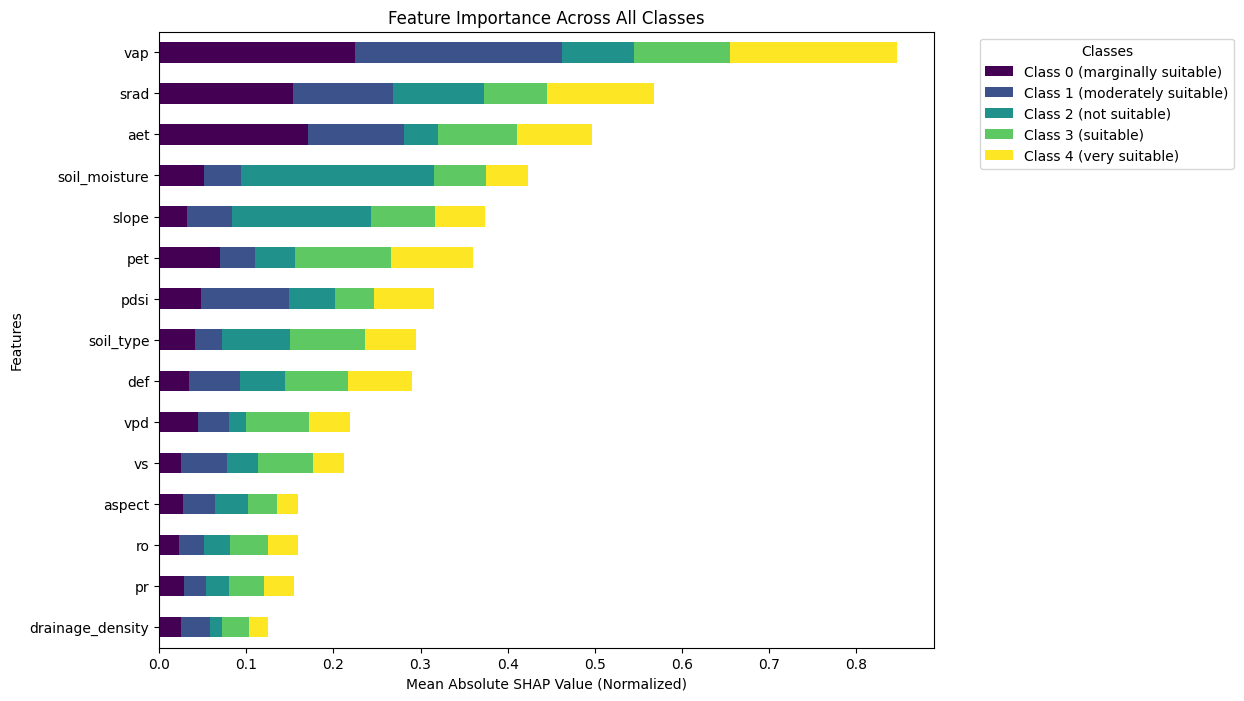

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import shap
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_csv('boro_final.csv')
data = data.drop(columns=['district', 'upazilla', 'elevation']) # elevation has only 1 class [low]

# Separate features and target variable
X = data.drop(columns=['boro'])  # Features
y = data['boro']  # Target variable

# Identify numerical features only
numerical_features = ['pdsi', 'aet', 'vap', 'srad', 'soil_moisture', 'pet', 'def', 'vs', 'vpd', 'pr', 'ro', 'aspect', 'slope', 'drainage_density', 'soil_type']

# Preprocess numerical features
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Use only numerical features
X = X[numerical_features]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a model (Random Forest Classifier)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Get the actual names of the classes
# class_names = model.classes_

# print(class_names)

# Predict and evaluate model accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Apply SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Verify the shape of shap_values and X_test
print(f"SHAP values shape: {np.array(shap_values).shape}")
print(f"X_test shape: {X_test.shape}")

# Calculate mean absolute SHAP values for each feature and class
mean_abs_shap_values = np.mean(np.abs(shap_values), axis=0)

# Normalize SHAP values for each class
normalized_shap_values = mean_abs_shap_values / mean_abs_shap_values.sum(axis=0)

# Transpose normalized_shap_values to match the shape of the features
shap_values_transposed = np.transpose(normalized_shap_values)

# Create DataFrame for plotting
shap_df = pd.DataFrame(shap_values_transposed, columns=numerical_features)

# Calculate total SHAP values and sort features in ascending order
total_shap_values = shap_df.sum(axis=0)
sorted_features = total_shap_values.sort_values(ascending=True).index
shap_df_sorted = shap_df[sorted_features]

# Get the actual names of the classes
class_names = model.classes_

# Create legend labels with class number and corresponding class name in brackets
legend_labels = [f"Class {i} ({class_names[i]})" for i in range(len(class_names))]

# Plot combined feature importance with color indicating class importance
fig, ax = plt.subplots(figsize=(10, 8))
shap_df_sorted.T.plot(kind='barh', stacked=True, colormap='viridis', ax=ax)
ax.set_title('Feature Importance Across All Classes')
ax.set_xlabel('Mean Absolute SHAP Value (Normalized)')
ax.set_ylabel('Features')
plt.legend(title='Classes', labels=legend_labels, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# Interpreting a Random Forest Classifier Using SHAP: Feature Importance Analysis for Each Class

Accuracy: 0.7526881720430108
Classification Report:
                      precision    recall  f1-score   support

marginally suitable       0.75      0.75      0.75        12
moderately suitable       0.40      0.33      0.36         6
       not suitable       0.89      0.73      0.80        11
           suitable       0.53      0.50      0.52        16
      very suitable       0.83      0.90      0.86        48

           accuracy                           0.75        93
          macro avg       0.68      0.64      0.66        93
       weighted avg       0.75      0.75      0.75        93



 95%|=================== | 442/465 [00:15<00:00]       


SHAP summary plot for class 0 (marginally suitable):


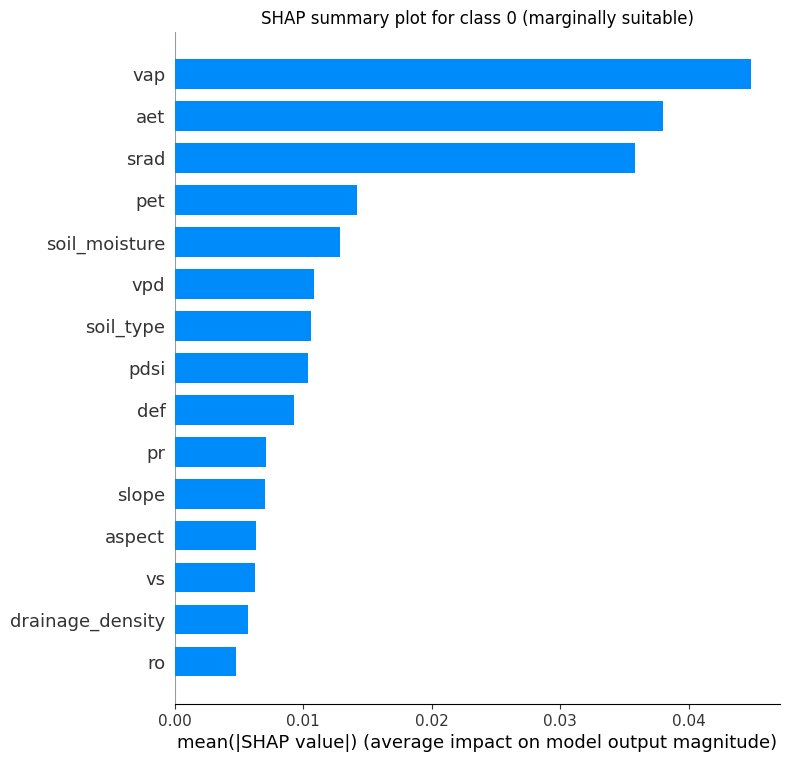

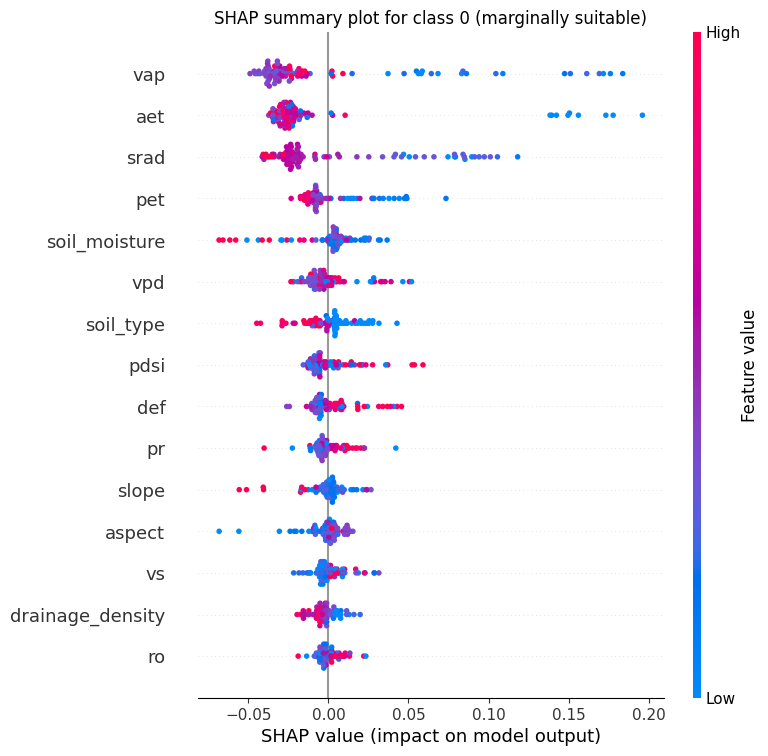


SHAP summary plot for class 1 (moderately suitable):


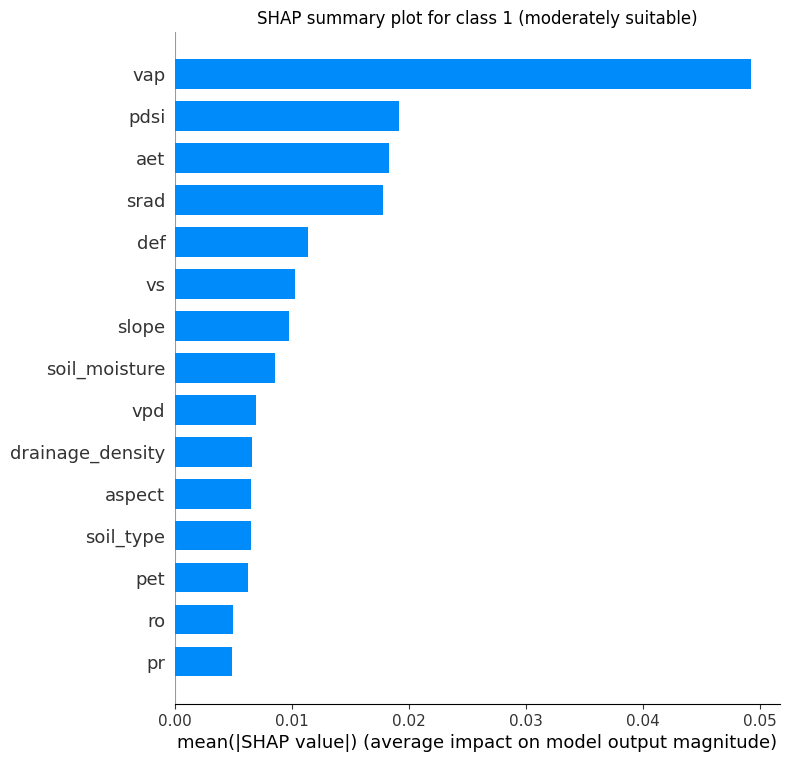

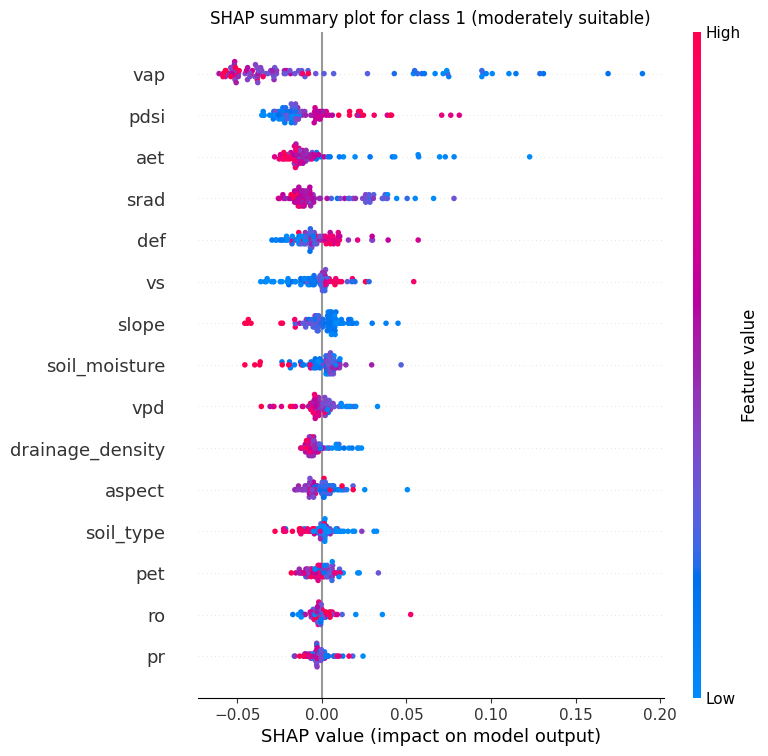


SHAP summary plot for class 2 (not suitable):


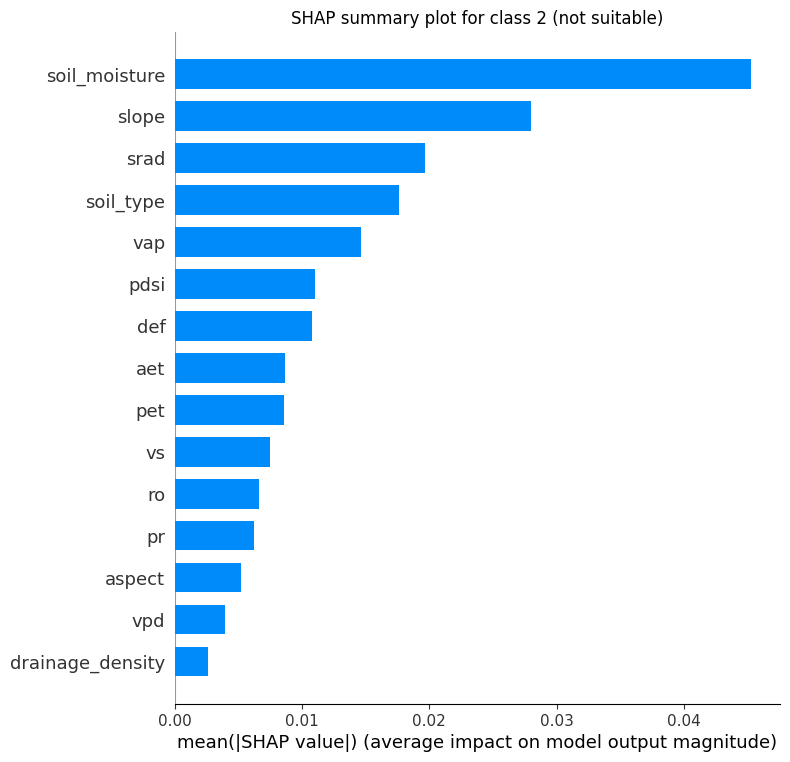

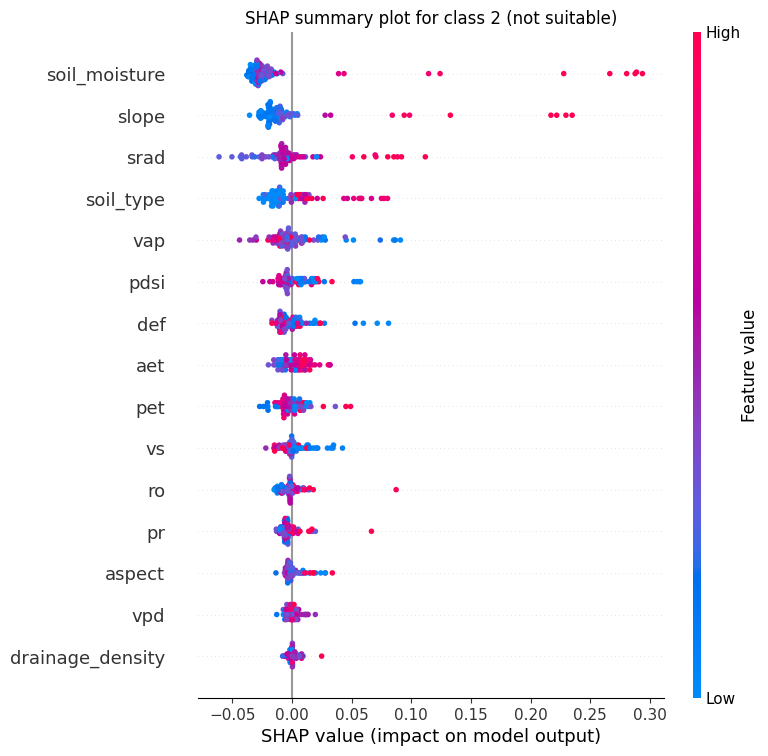


SHAP summary plot for class 3 (suitable):


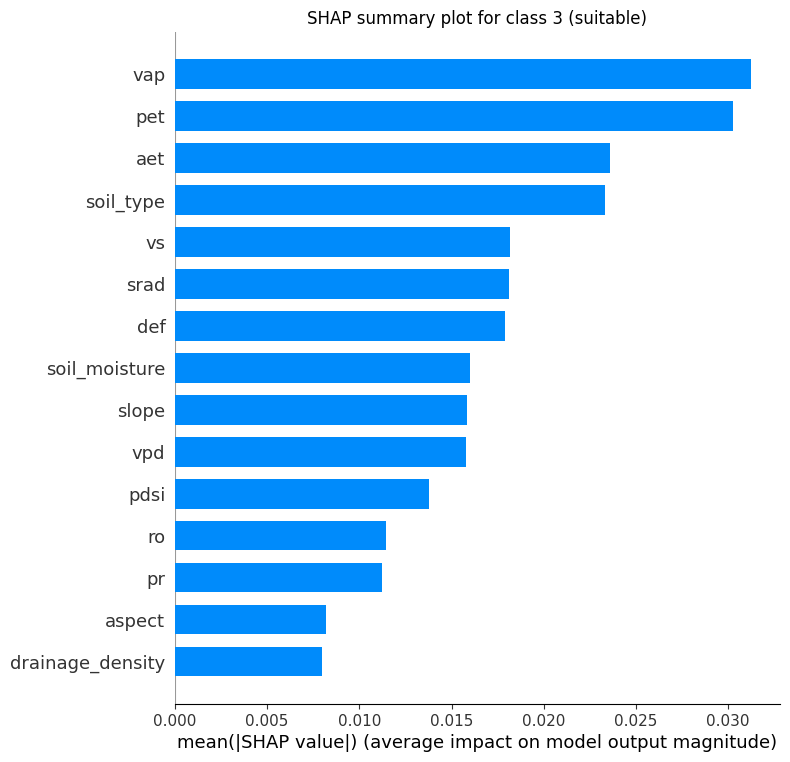

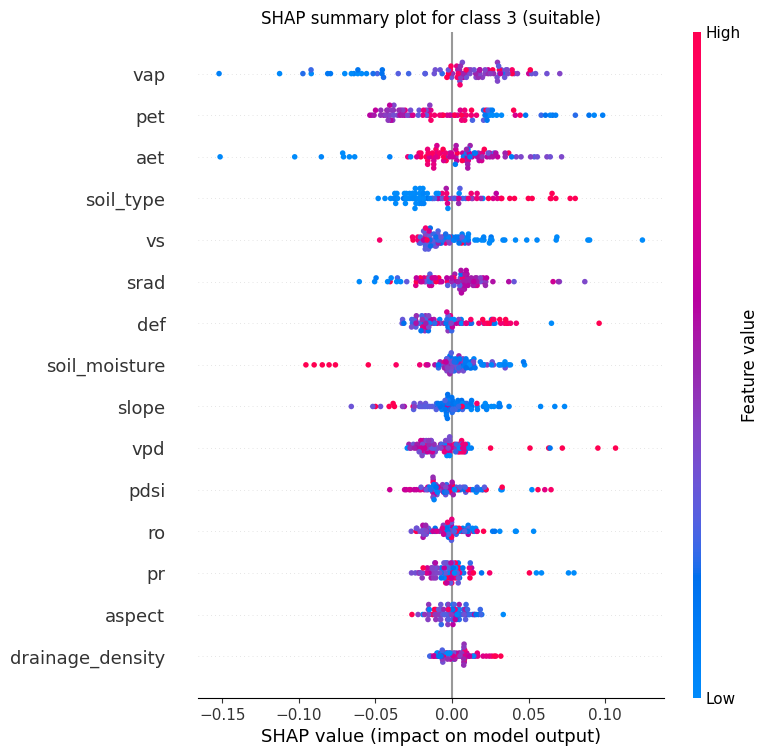


SHAP summary plot for class 4 (very suitable):


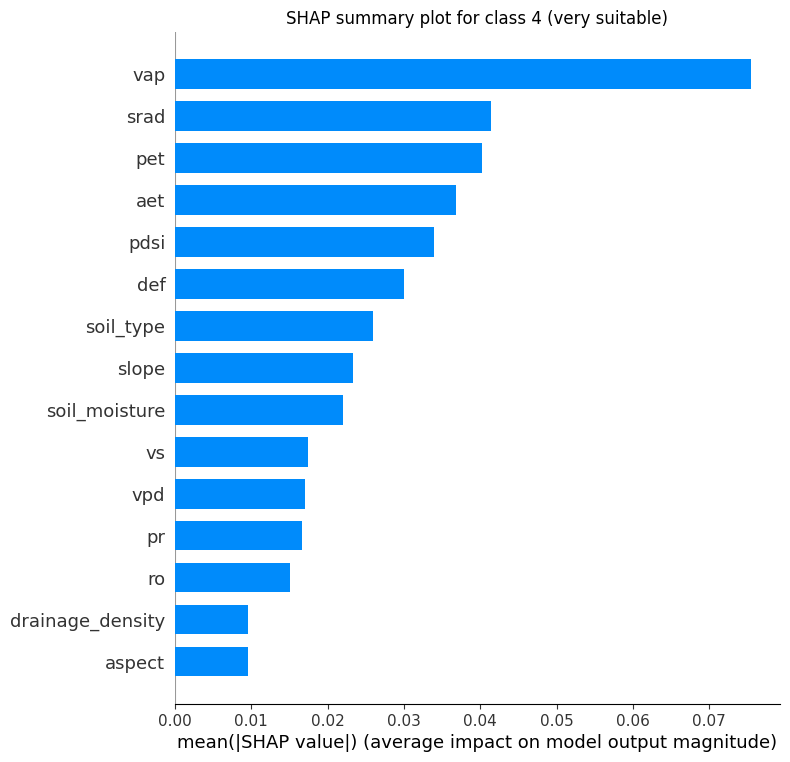

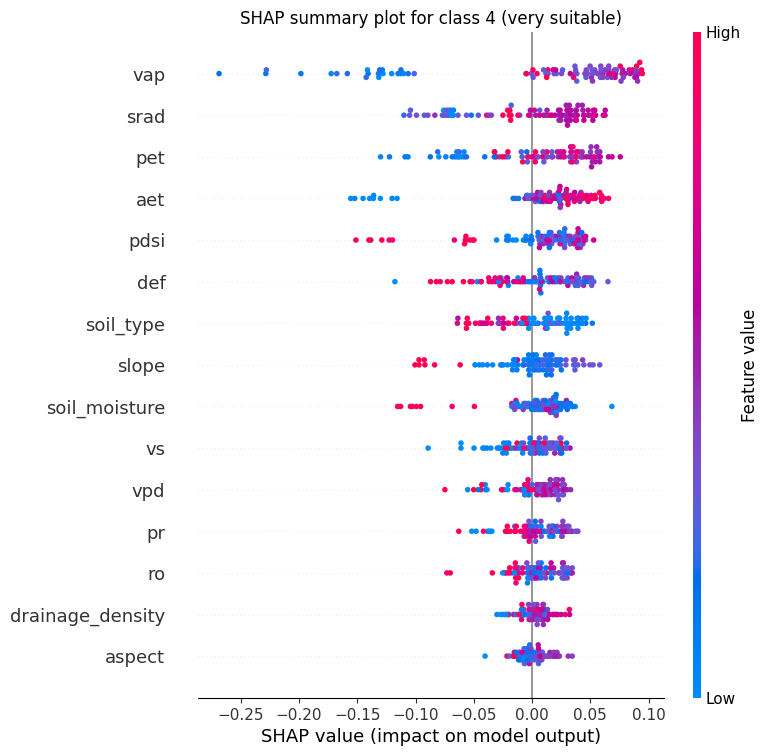

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import shap
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_csv('boro_final.csv')
data = data.drop(columns=['district', 'upazilla', 'elevation'])

# Separate features and target variable
X = data.drop(columns=['boro'])  # Features
y = data['boro']  # Target variable

# Identify numerical features only
numerical_features = ['pdsi', 'aet', 'vap', 'srad', 'soil_moisture', 'pet', 'def', 'vs', 'vpd', 'pr', 'ro', 'aspect', 'slope', 'drainage_density', 'soil_type']

# Preprocess numerical features
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Use only numerical features
X = X[numerical_features]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a model (Random Forest Classifier)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate model accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Apply SHAP
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Define class labels (replace these with your actual class labels if they are different)
class_labels = model.classes_

# SHAP summary plots for each output class
for i in range(shap_values.shape[2]):
    class_number = i
    class_label = class_labels[i]
    print(f"\nSHAP summary plot for class {class_number} ({class_label}):")
    shap.summary_plot(shap_values[:, :, class_number], X_test, plot_type="bar", feature_names=numerical_features, show=False)
    plt.title(f'SHAP summary plot for class {class_number} ({class_label})')
    plt.show()

    shap.summary_plot(shap_values[:, :, class_number], X_test, feature_names=numerical_features, show=False)
    plt.title(f'SHAP summary plot for class {class_number} ({class_label})')
    plt.show()


# model accuracy

In [4]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Hyperparameter tuning using Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Train the best model
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Predict and evaluate model accuracy
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Accuracy: 0.8284313725490197
Classification Report:
                      precision    recall  f1-score   support

marginally suitable       0.84      0.91      0.88        47
moderately suitable       0.90      0.86      0.88        44
       not suitable       0.90      1.00      0.95        35
           suitable       0.76      0.66      0.70        38
      very suitable       0.72      0.70      0.71        40

           accuracy                           0.83       204
          macro avg       0.82      0.83      0.82       204
       weighted avg       0.83      0.83      0.83       204



In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import shap
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('boro_final.csv')# Load the dataset
# data = data.drop(columns=['district', 'upazilla'])

# Separate features and target variable
X = data.drop(columns=['boro'])  # Features
y = data['boro']  # Target variable
data = data.drop(columns=['district', 'upazilla'])

# Separate features and target variable
X = data.drop(columns=['boro'])  # Features
y = data['boro']  # Target variable

# Identify numerical and categorical features, excluding 'district' and 'upazilla'
numerical_features = ['pdsi', 'aet', 'vap', 'srad', 'soil_moisture', 'pet', 'def', 'vs', 'vpd', 'pr', 'ro', 'aspect', 'slope', 'drainage_density', 'soil_type', 'elevation']
categorical_features = ['pdsi_class', 'aet_class', 'vap_class', 'srad_class', 'soil_moisture_class',
                        'pet_class', 'def_class', 'vs_class', 'vpd_class', 'pr_class', 'ro_class',
                        'aspect_class', 'slope_class', 'drainage_class', 'soil_type_class',
                        'elevation_class']

# Preprocess numerical features
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# One-hot encode categorical features
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_categorical_data = encoder.fit_transform(X[categorical_features])
encoded_categorical_df = pd.DataFrame(encoded_categorical_data, columns=encoder.get_feature_names_out(categorical_features))

# Drop original categorical features and concatenate encoded features
X = X.drop(columns=categorical_features)
X = pd.concat([X, encoded_categorical_df], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a model (Random Forest Classifier)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate model accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.7956989247311828
Classification Report:
                      precision    recall  f1-score   support

marginally suitable       0.85      0.92      0.88        12
moderately suitable       0.40      0.33      0.36         6
       not suitable       0.89      0.73      0.80        11
           suitable       0.67      0.62      0.65        16
      very suitable       0.84      0.90      0.87        48

           accuracy                           0.80        93
          macro avg       0.73      0.70      0.71        93
       weighted avg       0.79      0.80      0.79        93



# SHAP analysis of levels of most important feature

['vap_class_low' 'vap_class_moderate' 'vap_class_very high']


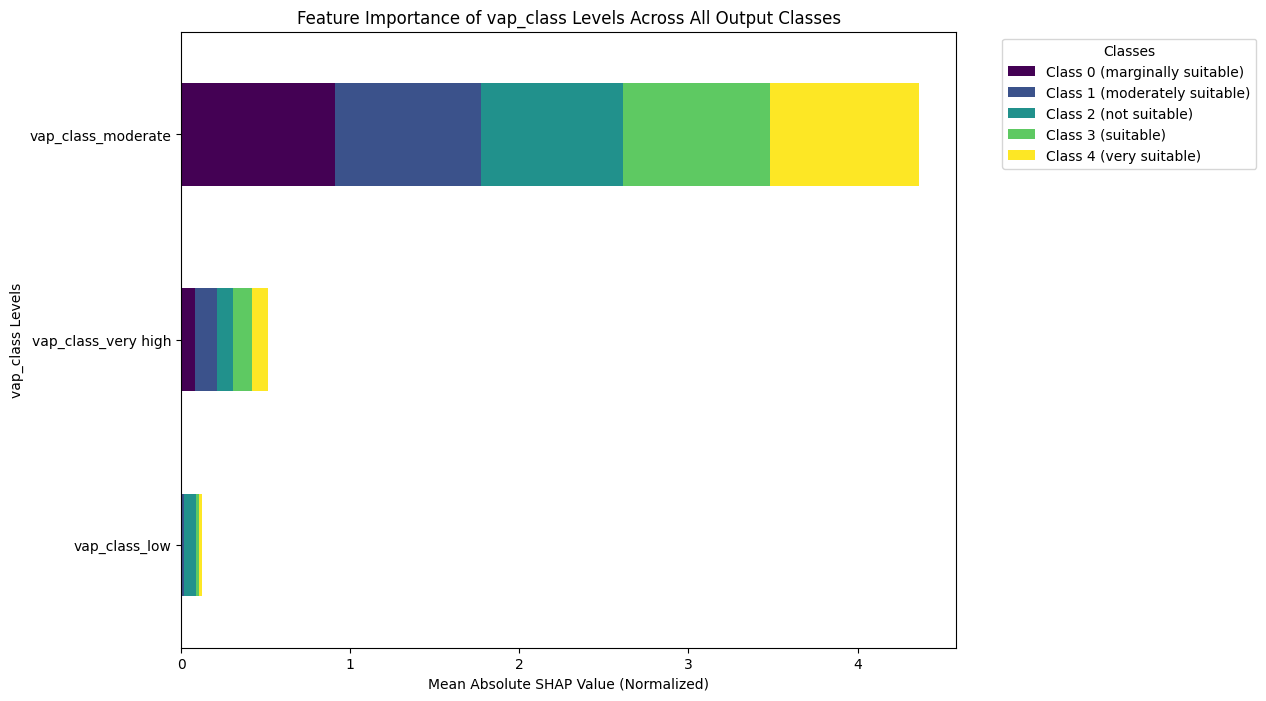

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
import shap
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_csv('boro_final.csv')
data = data.drop(columns=['district', 'upazilla'])

# Separate features and target variable
X = data[['vap_class']]  # Use only def_class as features
y = data['boro']  # Target variable

# Preprocess categorical features
categorical_transformer = OneHotEncoder(drop='first')

# Apply one-hot encoding to def_class
X_encoded = categorical_transformer.fit_transform(X)

# Convert the one-hot encoded features back to a DataFrame
encoded_feature_names = categorical_transformer.get_feature_names_out(['vap_class'])
print(encoded_feature_names)
X_encoded_df = pd.DataFrame(X_encoded.toarray(), columns=encoded_feature_names)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded_df, y, test_size=0.2, random_state=42)

# Train a model (Random Forest Classifier)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Get the actual names of the classes
class_names = model.classes_

# Predict and evaluate model accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)
# print("Classification Report:\n", classification_report(y_test, y_pred))

# Apply SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Verify the shape of shap_values and X_test
# print(f"SHAP values shape: {np.array(shap_values).shape}")
# print(f"X_test shape: {X_test.shape}")

# Calculate mean absolute SHAP values for each feature and class
mean_abs_shap_values = np.mean(np.abs(shap_values), axis=0)

# Normalize SHAP values for each class
normalized_shap_values = mean_abs_shap_values / mean_abs_shap_values.sum(axis=0)

# Transpose normalized_shap_values to match the shape of the features
shap_values_transposed = np.transpose(normalized_shap_values)

# Create DataFrame for plotting
shap_df = pd.DataFrame(shap_values_transposed, columns=encoded_feature_names)

# Calculate total SHAP values and sort features in ascending order
total_shap_values = shap_df.sum(axis=0)
sorted_features = total_shap_values.sort_values(ascending=True).index
shap_df_sorted = shap_df[sorted_features]

# Create legend labels with class number and corresponding class name in brackets
legend_labels = [f"Class {i} ({class_names[i]})" for i in range(len(class_names))]

# Plot combined feature importance with color indicating class importance
fig, ax = plt.subplots(figsize=(10, 8))
shap_df_sorted.T.plot(kind='barh', stacked=True, colormap='viridis', ax=ax)
ax.set_title('Feature Importance of vap_class Levels Across All Output Classes')
ax.set_xlabel('Mean Absolute SHAP Value (Normalized)')
ax.set_ylabel('vap_class Levels')
plt.legend(title='Classes', labels=legend_labels, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [7]:
# import pandas as pd
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, classification_report

# # Load the dataset
# data = pd.read_csv('boro_final.csv')
# data = data.drop(columns=['district', 'upazilla'])

# # Separate features and target variable
# X = data.drop(columns=['boro'])  # Features
# y = data['boro']  # Target variable

# # Identify numerical features only
# numerical_features = ['pdsi', 'aet', 'vap', 'srad', 'soil_moisture', 'pet', 'def', 'vs', 'vpd', 'pr', 'ro', 'aspect', 'slope', 'drainage_density', 'soil_type', 'elevation']

# # Step 1: Calculate the Correlation Matrix
# correlation_matrix = X[numerical_features].corr()

# # Visualize the Correlation Matrix
# plt.figure(figsize=(15, 10))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
# plt.title('Correlation Matrix of Numerical Features')
# plt.show()

# # Step 2: Select Features to Remove
# # We will remove one feature from each pair of features with a correlation coefficient greater than 0.9
# threshold = 0.9
# collinear_features = set()
# for i in range(len(correlation_matrix.columns)):
#     for j in range(i):
#         if abs(correlation_matrix.iloc[i, j]) > threshold:
#             collinear_features.add(correlation_matrix.columns[i])

# # Remove the collinear features
# selected_features = [feature for feature in numerical_features if feature not in collinear_features]

# # Step 3: Scale the Selected Features
# scaler = StandardScaler()
# X[selected_features] = scaler.fit_transform(X[selected_features])

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)

# # Train a model (Random Forest Classifier)
# model = RandomForestClassifier(random_state=42)
# model.fit(X_train, y_train)

# # Step 4: Evaluate the Model
# y_pred = model.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy with Selected Features:", accuracy)
# print("Classification Report with Selected Features:\n", classification_report(y_test, y_pred))

# # Optional: SHAP Analysis
# # import shap
# # explainer = shap.TreeExplainer(model)
# # shap_values = explainer.shap_values(X_test)

# # # SHAP values analysis
# # mean_abs_shap_values = np.mean(np.abs(shap_values), axis=0).mean(axis=0)
# # shap_importance_df = pd.DataFrame({'feature': selected_features, 'shap_importance': mean_abs_shap_values})
# # shap_importance_df = shap_importance_df.sort_values(by='shap_importance', ascending=False)

# # # Plot SHAP values for selected features
# # fig, ax = plt.subplots(figsize=(10, 8))
# # shap_importance_df.set_index('feature')['shap_importance'].plot(kind='barh', ax=ax)
# # ax.set_title('SHAP Values for Selected Features')
# # ax.set_xlabel('Mean Absolute SHAP Value')
# # ax.set_ylabel('Features')
# # plt.show()
